In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exploration Data

In [71]:
df = pd.read_csv("/home/walaa-shaaban/Desktop/project_git/E-Commerce-Neural-Nework/data.csv", encoding= 'unicode_escape')

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [73]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [74]:
df.shape

(541909, 8)

In [75]:
df.drop(['Description', 'CustomerID'], axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ MB


In [77]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [78]:
df['year'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[2])
df['month'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[0])

In [79]:
countries = df['Country'].value_counts().sort_index()[:10].index.values.tolist()
mean_unit_price = [np.round(df[df['Country']==c]['UnitPrice'].sum(), 4)for c in countries ]
df_country = pd.DataFrame({'country' : countries,  'UnitPrice':mean_unit_price})

In [80]:
df_country

,country,UnitPrice
0,Australia,4054.75
1,Austria,1701.52
2,Bahrain,86.57
3,Belgium,7540.13
4,Brazil,142.60
5,Canada,910.58
6,Channel Islands,3738.55
7,Cyprus,3920.07
8,Czech Republic,88.15
9,Denmark,1266.95


# Data visualization

In [81]:
color = sns.color_palette()[4]

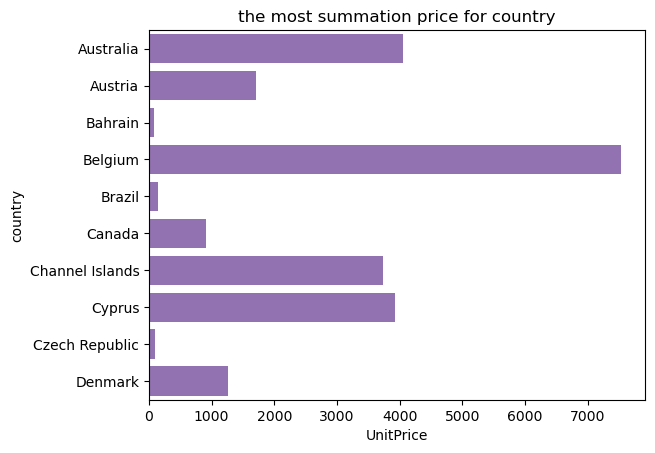

In [82]:
plt.title("the most summation price for country")
sns.barplot(data=df_country, y='country', x="UnitPrice", color=color);

In [83]:
months = df['month'].value_counts().index.values.tolist()
mean_unit_price = [np.round(df[df["month"]==month]['UnitPrice'].sum(), 4) for month in months ]
df_month = pd.DataFrame({'month' : months,  'UnitPrice':mean_unit_price})

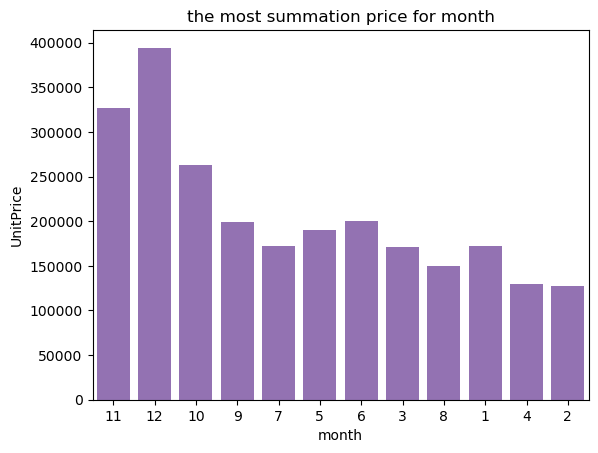

In [84]:
plt.title("the most summation price for month")
sns.barplot(data=df_month, x='month', y="UnitPrice", color=color);

Create Model 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
 6   year         541909 non-null  object 
 7   month        541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [86]:
df['month'], df['year'] = pd.to_numeric(df['month']), pd.to_numeric(df['year'])

In [87]:
df = df.loc[:, ["year", "month", "Quantity", "UnitPrice"]]


In [88]:
df.head()

,year,month,Quantity,UnitPrice
0,2010,12,6,2.55
1,2010,12,6,3.39
2,2010,12,8,2.75
3,2010,12,6,3.39
4,2010,12,6,3.39


In [89]:
df[['Quantity', 'UnitPrice']] = MinMaxScaler().fit_transform(df.iloc[:,2:])

In [90]:
df.head()

,year,month,Quantity,UnitPrice
0,2010,12,0.500037,0.221150
1,2010,12,0.500037,0.221167
2,2010,12,0.500049,0.221154
3,2010,12,0.500037,0.221167
4,2010,12,0.500037,0.221167


Create Model

In [91]:
X = df.drop("UnitPrice", axis=1).values
y = df["UnitPrice"].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=16, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=64, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))

In [99]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [100]:
ann.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/30
13548/13548 [==============================] - 62s 5ms/step - loss: 67.6591 - val_loss: 2.2036e-05
Epoch 2/30
13548/13548 [==============================] - 79s 6ms/step - loss: 0.4768 - val_loss: 0.2458
Epoch 3/30
13548/13548 [==============================] - 96s 7ms/step - loss: 0.3139 - val_loss: 5.0395e-04
Epoch 4/30
13548/13548 [==============================] - 97s 7ms/step - loss: 0.2394 - val_loss: 0.0703
Epoch 5/30
13548/13548 [==============================] - 99s 7ms/step - loss: 0.1991 - val_loss: 5.9256e-04


In [102]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,67.659096,0.000022
1,0.476751,0.245781
2,0.313870,0.000504
3,0.239376,0.070287
4,0.199147,0.000593


<Axes: >

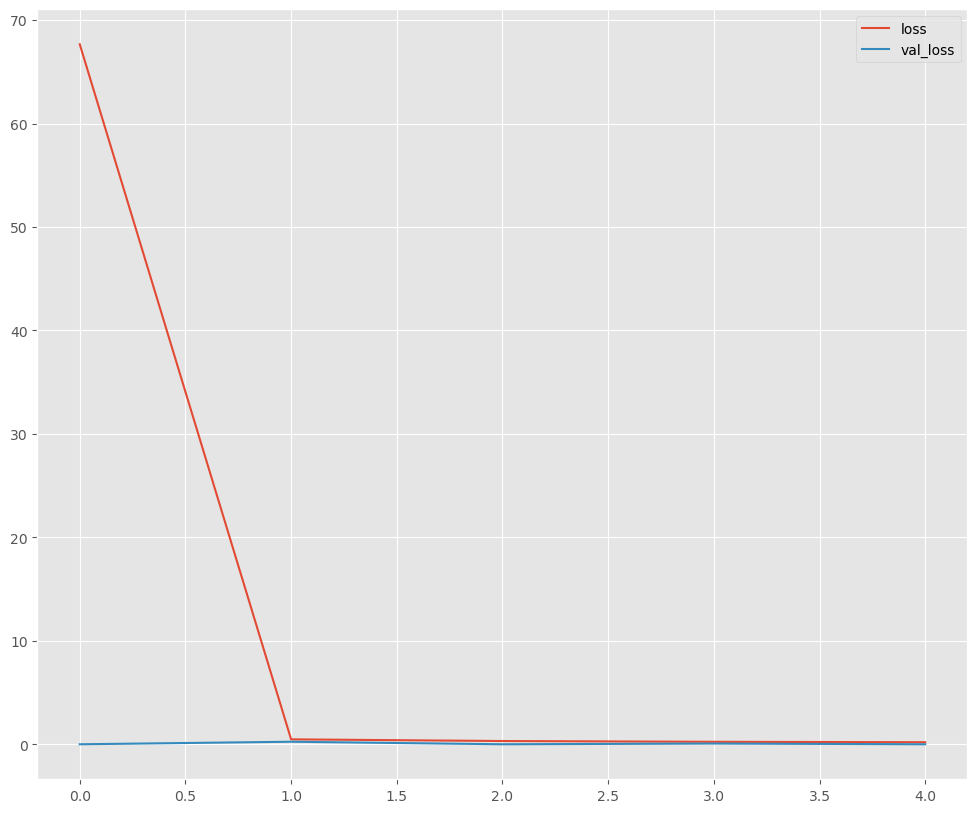

In [103]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [104]:
ann.evaluate(X_train,y_train)

13548/13548 [==============================] - 77s 6ms/step - loss: 5.9452e-04


0.0005945189041085541

In [105]:
ann.evaluate(X_test,y_test)

3387/3387 [==============================] - 16s 5ms/step - loss: 5.9256e-04


0.0005925570148974657

In [107]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["UnitPrice"]), predictions_df],axis=1)
comparison_df 

 117/3387 [>.............................] - ETA: 9s

3387/3387 [==============================] - 12s 3ms/step


,UnitPrice,Predictions
151173,0.221154,NaN
344753,0.221132,NaN
463406,0.221116,NaN
219450,0.221149,NaN
513545,0.221298,NaN
...,...,...
108374,NaN,0.244573
108376,NaN,0.244573
108377,NaN,0.243162
108378,NaN,0.246679


In [108]:
comparison_df.isna().sum()

UnitPrice      86659
Predictions    86659
dtype: int64

In [109]:
comparison_df.dropna(inplace=True)

In [111]:
comparison_df.shape

(21723, 2)

In [112]:
print(y_test.shape)       # The actual values are 1D arrays
print(predictions.shape)

(108382,)
(108382, 1)


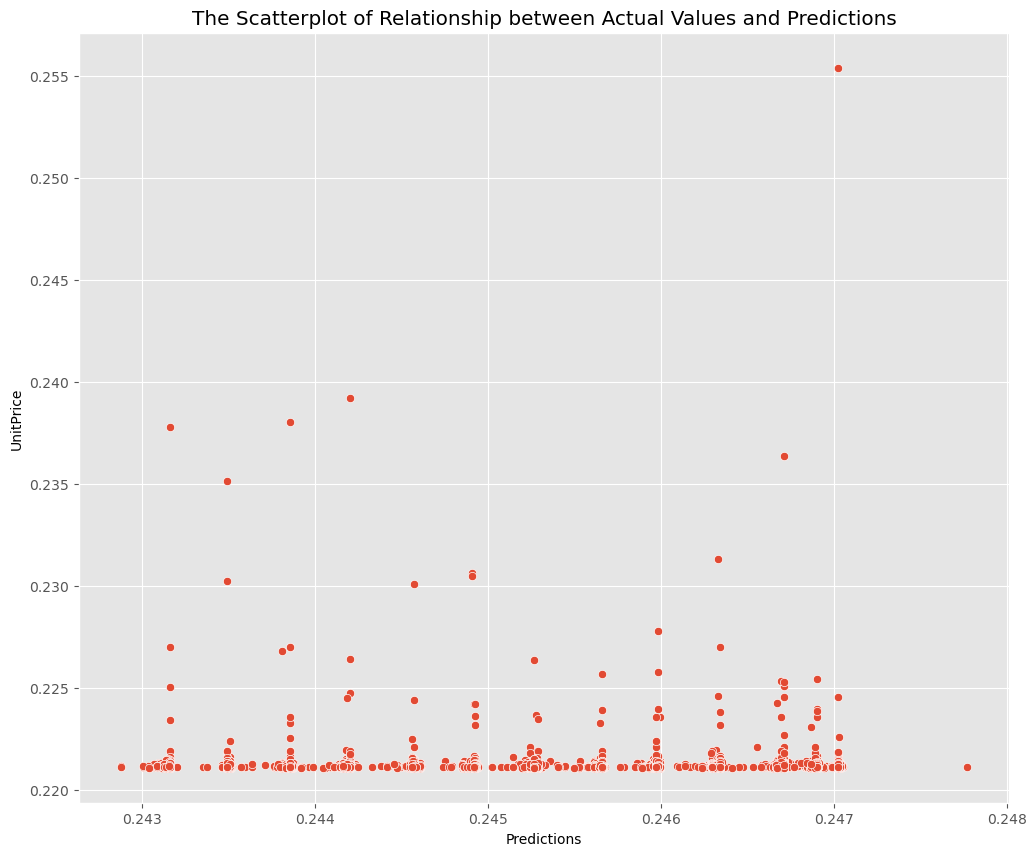

In [121]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = comparison_df['Predictions'],y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("UnitPrice");

In [122]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.02428483149108968
MSE: 0.000592557502347898
RMSE: 0.024342504027891173


In [123]:
metrics.explained_variance_score(y_test,predictions) 

-0.6566507489818048